In [1]:
import shipmmg_4dof_in_waves
from shipmmg_4dof_in_waves.mmg_4dof_in_waves import (
    Mmg4DofInWavesBasicParams,
    Mmg4DofInWavesManeuveringParams,
    simulate_mmg_4dof_in_waves,
    get_wave_values_from_simulation_result
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
plt.style.use(['science','ieee','high-vis','grid']) # ここでスタイルを設定する

# MMG 4DOF in Waves simulation DEMO using KCS model

In [2]:
ρ = 1025.0  # 海水密度

# KCS Container Ship
L_pp = 3.057  # 船長Lpp[m]
B = 0.428   # 船幅[m]
d = 0.144  # 喫水[m]
g = 9.81  # 重力加速度[m/s^2]
nabla = 0.122  # 排水量[m^3]　
x_G = -0.045  # 重心位置[m] 
z_G = -0.035 #船体上下重心位置(GM-KM+d)
z_H = 0.072 #喫水中央
m_x_dash = 0.0061  # 付加質量x(無次元)　
m_y_dash = 0.1521  # 付加質量y(無次元)　
GM = 0.008
D_p = 0.105  # プロペラ直径[m]
A_R = 0.0096  # 舵断面積[m^2]
H_R = 0.132  # 舵高さ
x_R = -0.500  # 舵の相対位置
f_α = 3.006  # 直圧力勾配係数　教科書p24
ε = 0.956
t_R = 0.258
a_H = 0.361
x_H_dash = -0.711
γ_R_plus = 0.492
γ_R_minus = 0.338
l_P_dash = -0.7
l_R_dash = -0.755
z_P_dash = 0.55
z_R_dash = 0.556
κ = 0.633
t_P = 0.178
w_P0 = 0.353
x_P_dash = -0.480  # 船長に対するプロペラ位置
J_xx_dash = 0.005
J_zz_dash = 0.0089
a = 0.228
b = 0.0068
α_z = 0.025
z_R = 0.08 #舵の幾何学的図心
h_a = 0.02414
z_W = 0.08

basic_params = Mmg4DofInWavesBasicParams(
    L_pp=L_pp,  # 船長Lpp[m]
    B=B,  # 船幅[m]
    d=d,  # 喫水[m]
    g=g,
    m=ρ * nabla,  # 質量(無次元化)[kg]
    x_G=x_G,  # 重心位置[]
    z_G=z_G,  # 船体上下重心位置[]
    z_H=z_H,  # 喫水中央
    m_x=(0.5 * ρ * (L_pp ** 2) * d) * m_x_dash,
    m_y=(0.5 * ρ * (L_pp ** 2) * d) * m_y_dash,
    GM=GM,
    D_p=D_p,  # プロペラ直径[m]
    A_R=A_R,  # 舵断面積[m^2]
    x_R=x_R,  # 舵の相対位置
    I_zz=ρ * nabla * ((0.25 * L_pp) ** 2),  # 慣性モーメント
    η=D_p / H_R,
    f_α=f_α,  # 直圧力勾配係数
    ϵ=ε,
    t_R=t_R,
    a_H=a_H,
    x_H=x_H_dash * L_pp,
    γ_R_plus=γ_R_plus,
    γ_R_minus=γ_R_minus,
    l_P_dash=l_P_dash,
    l_R_dash=l_R_dash,
    z_P_dash=z_P_dash,
    z_R_dash=z_R_dash,
    κ=κ,
    t_P=t_P,
    w_P0=w_P0,
    I_xx=ρ * nabla * ((0.25 * B) ** 2),
    J_xx=(0.5 * ρ * (B ** 4) * d) * J_xx_dash,
    J_zz=(0.5 * ρ * (L_pp ** 4) * d) * J_zz_dash,
    a=a,
    b=b,
    α_z=α_z,
    z_R=z_R,
    h_a=h_a,
    z_W=z_W,
)


k_0 = 0.4892
k_1 = -0.4053
k_2 = -0.0994
R_0_dash = 0.0183
X_vv_dash = -0.0726
X_vr_dash = -0.0424
X_rr_dash = -0.0139
X_vvvv_dash = -0.0760
X_vφ_dash = 0.0200
X_rφ_dash = 0.0205
X_φφ_dash = 0.0013
Y_v_dash = -0.2310
Y_r_dash = 0.0424
Y_vvv_dash = -1.635
Y_vvr_dash = -0.3090
Y_vrr_dash = -0.805
Y_rrr_dash = -0.005
Y_φ_dash = -0.0157
Y_vvφ_dash = 0.5748
Y_vφφ_dash = 0.2288
Y_rrφ_dash = -0.0642
Y_rφφ_dash = -0.1759
N_v_dash = -0.1130
N_r_dash = -0.0446
N_vvv_dash = -0.1653
N_vvr_dash = -0.6094
N_vrr_dash = -0.0349
N_rrr_dash = -0.0344
N_φ_dash = -0.0137
N_vvφ_dash = -0.2948
N_vφφ_dash = -0.0271
N_rrφ_dash = -0.0120
N_rφφ_dash = 0.1383

maneuvering_params = Mmg4DofInWavesManeuveringParams(
    k_0=k_0,
    k_1=k_1,
    k_2=k_2,
    R_0_dash=R_0_dash,
    X_vv_dash=X_vv_dash,
    X_vr_dash=X_vr_dash,
    X_rr_dash=X_rr_dash,
    X_vvvv_dash=X_vvvv_dash,
    X_vφ_dash=X_vφ_dash,
    X_rφ_dash=X_rφ_dash,
    X_φφ_dash=X_φφ_dash,
    Y_v_dash=Y_v_dash,
    Y_r_dash=Y_r_dash,
    Y_vvv_dash=Y_vvv_dash,
    Y_vvr_dash=Y_vvr_dash,
    Y_vrr_dash=Y_vrr_dash,
    Y_rrr_dash=Y_rrr_dash,
    Y_φ_dash=Y_φ_dash,
    Y_vvφ_dash=Y_vvφ_dash,
    Y_vφφ_dash=Y_vφφ_dash,
    Y_rrφ_dash=Y_rrφ_dash,
    Y_rφφ_dash=Y_rφφ_dash,
    N_v_dash=N_v_dash,
    N_r_dash=N_r_dash,
    N_vvv_dash=N_vvv_dash,
    N_vvr_dash=N_vvr_dash,
    N_vrr_dash=N_vrr_dash,
    N_rrr_dash=N_rrr_dash,
    N_φ_dash=N_φ_dash,
    N_vvφ_dash=N_vvφ_dash,
    N_vφφ_dash=N_vφφ_dash,
    N_rrφ_dash=N_rrφ_dash,
    N_rφφ_dash=N_rφφ_dash,
)

In [3]:
duration = 150 # [s]
max_δ_rad = 35 * np.pi / 180.0  # [rad]
n_const = 13.2  # [rps]
sampling_late = 4

sampling = duration * sampling_late
time_list = np.linspace(0.00, duration, sampling)
δ_rad_list = [0] * sampling
for i in range(sampling):
    δ_rad_list[i] = max_δ_rad

nps_list = np.array([n_const for i in range(sampling)])

In [4]:
sol = simulate_mmg_4dof_in_waves(
    basic_params,
    maneuvering_params,
    time_list,
    δ_rad_list,
    nps_list,
    u0=1.5,
    v0=0.0,
    r0=0.0,
    p0=0.0,
    χ0=0,
)
result = sol.sol(time_list)

In [5]:
u,v,r,p,x,y,psi,phi = result[0],result[1],result[2],result[3],result[4],result[5],result[6],result[7]

Text(0, 0.5, '$x/L$')

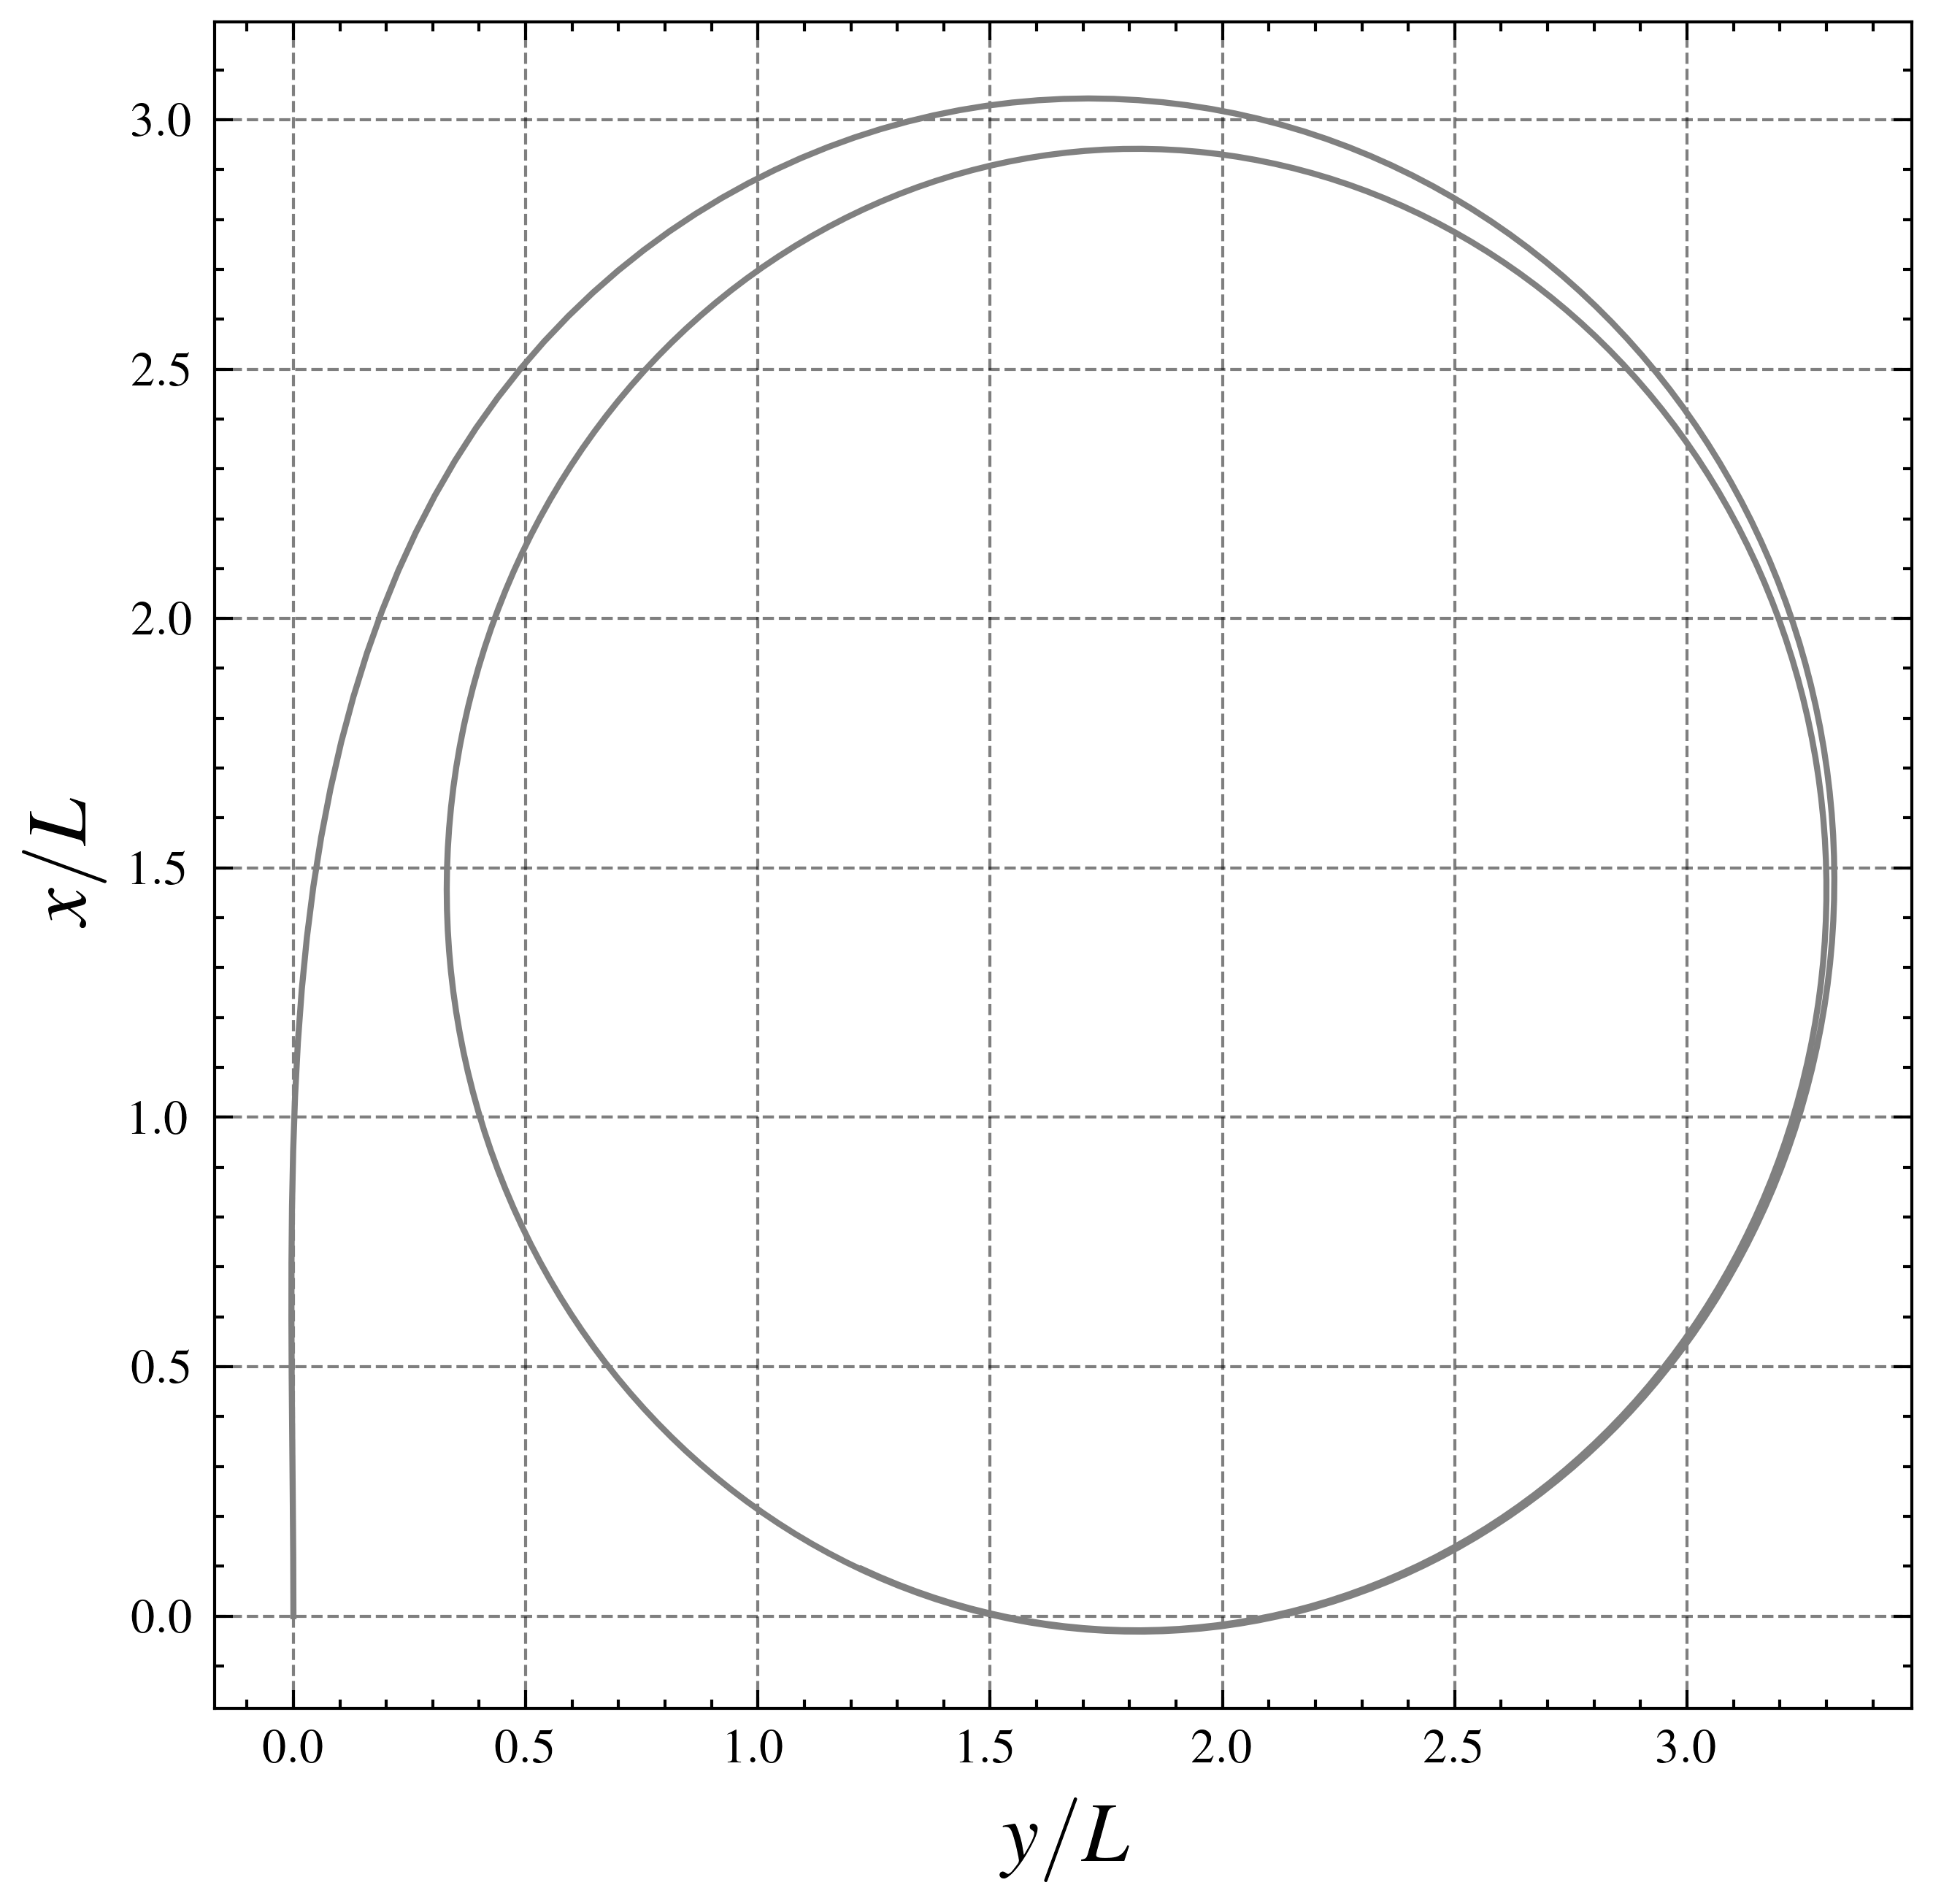

In [6]:
fig = plt.figure(figsize=(5, 5))
x_by_Lpp = x / L_pp
y_by_Lpp = y / L_pp
plt.plot(y_by_Lpp[:100*sampling_late], x_by_Lpp[:100*sampling_late], c='gray')
plt.xlabel("$y/L$", fontsize=14)
plt.ylabel("$x/L$", fontsize=14)

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(time_list, u, c='#4C72B0', linewidth=3)
axs[0, 0].set_title('$u$', fontsize=24)
# axs[0, 0].set_xlim(0, 40)
axs[0, 0].set(ylabel='u [m/s]')

axs[0, 1].plot(time_list, v, c='#DD8452', linewidth=3)
axs[0, 1].set_title('$v$', fontsize=24)
# axs[0, 1].set_xlim(0, 40)
axs[0, 1].set(ylabel='v [m/s]')


axs[1, 0].plot(time_list, r, c='#55A868', linewidth=3)
axs[1, 0].set_title('$r$', fontsize=24)
# axs[1, 0].set_xlim(0, 40)
axs[1, 0].set(ylabel='r [rad/s]')


axs[1, 1].plot(time_list, phi * 180 / np.pi, c='#8172B3', linewidth=3)
axs[1, 1].set_title('$\phi$', fontsize=24)
# axs[1, 1].set_xlim(0, 40)
axs[1, 1].set(ylabel='$\phi$ [deg]')


for ax in axs.flat:
    ax.set(xlabel='Time [s]')

plt.tight_layout()
plt.show()

In [8]:
(
    X_W_list,
    Y_W_list,
    N_W_list,
    K_W_list,
) = get_wave_values_from_simulation_result(
    u,
    v,
    r,
    p,
    psi,
    basic_params,
    return_all_values=False,
)

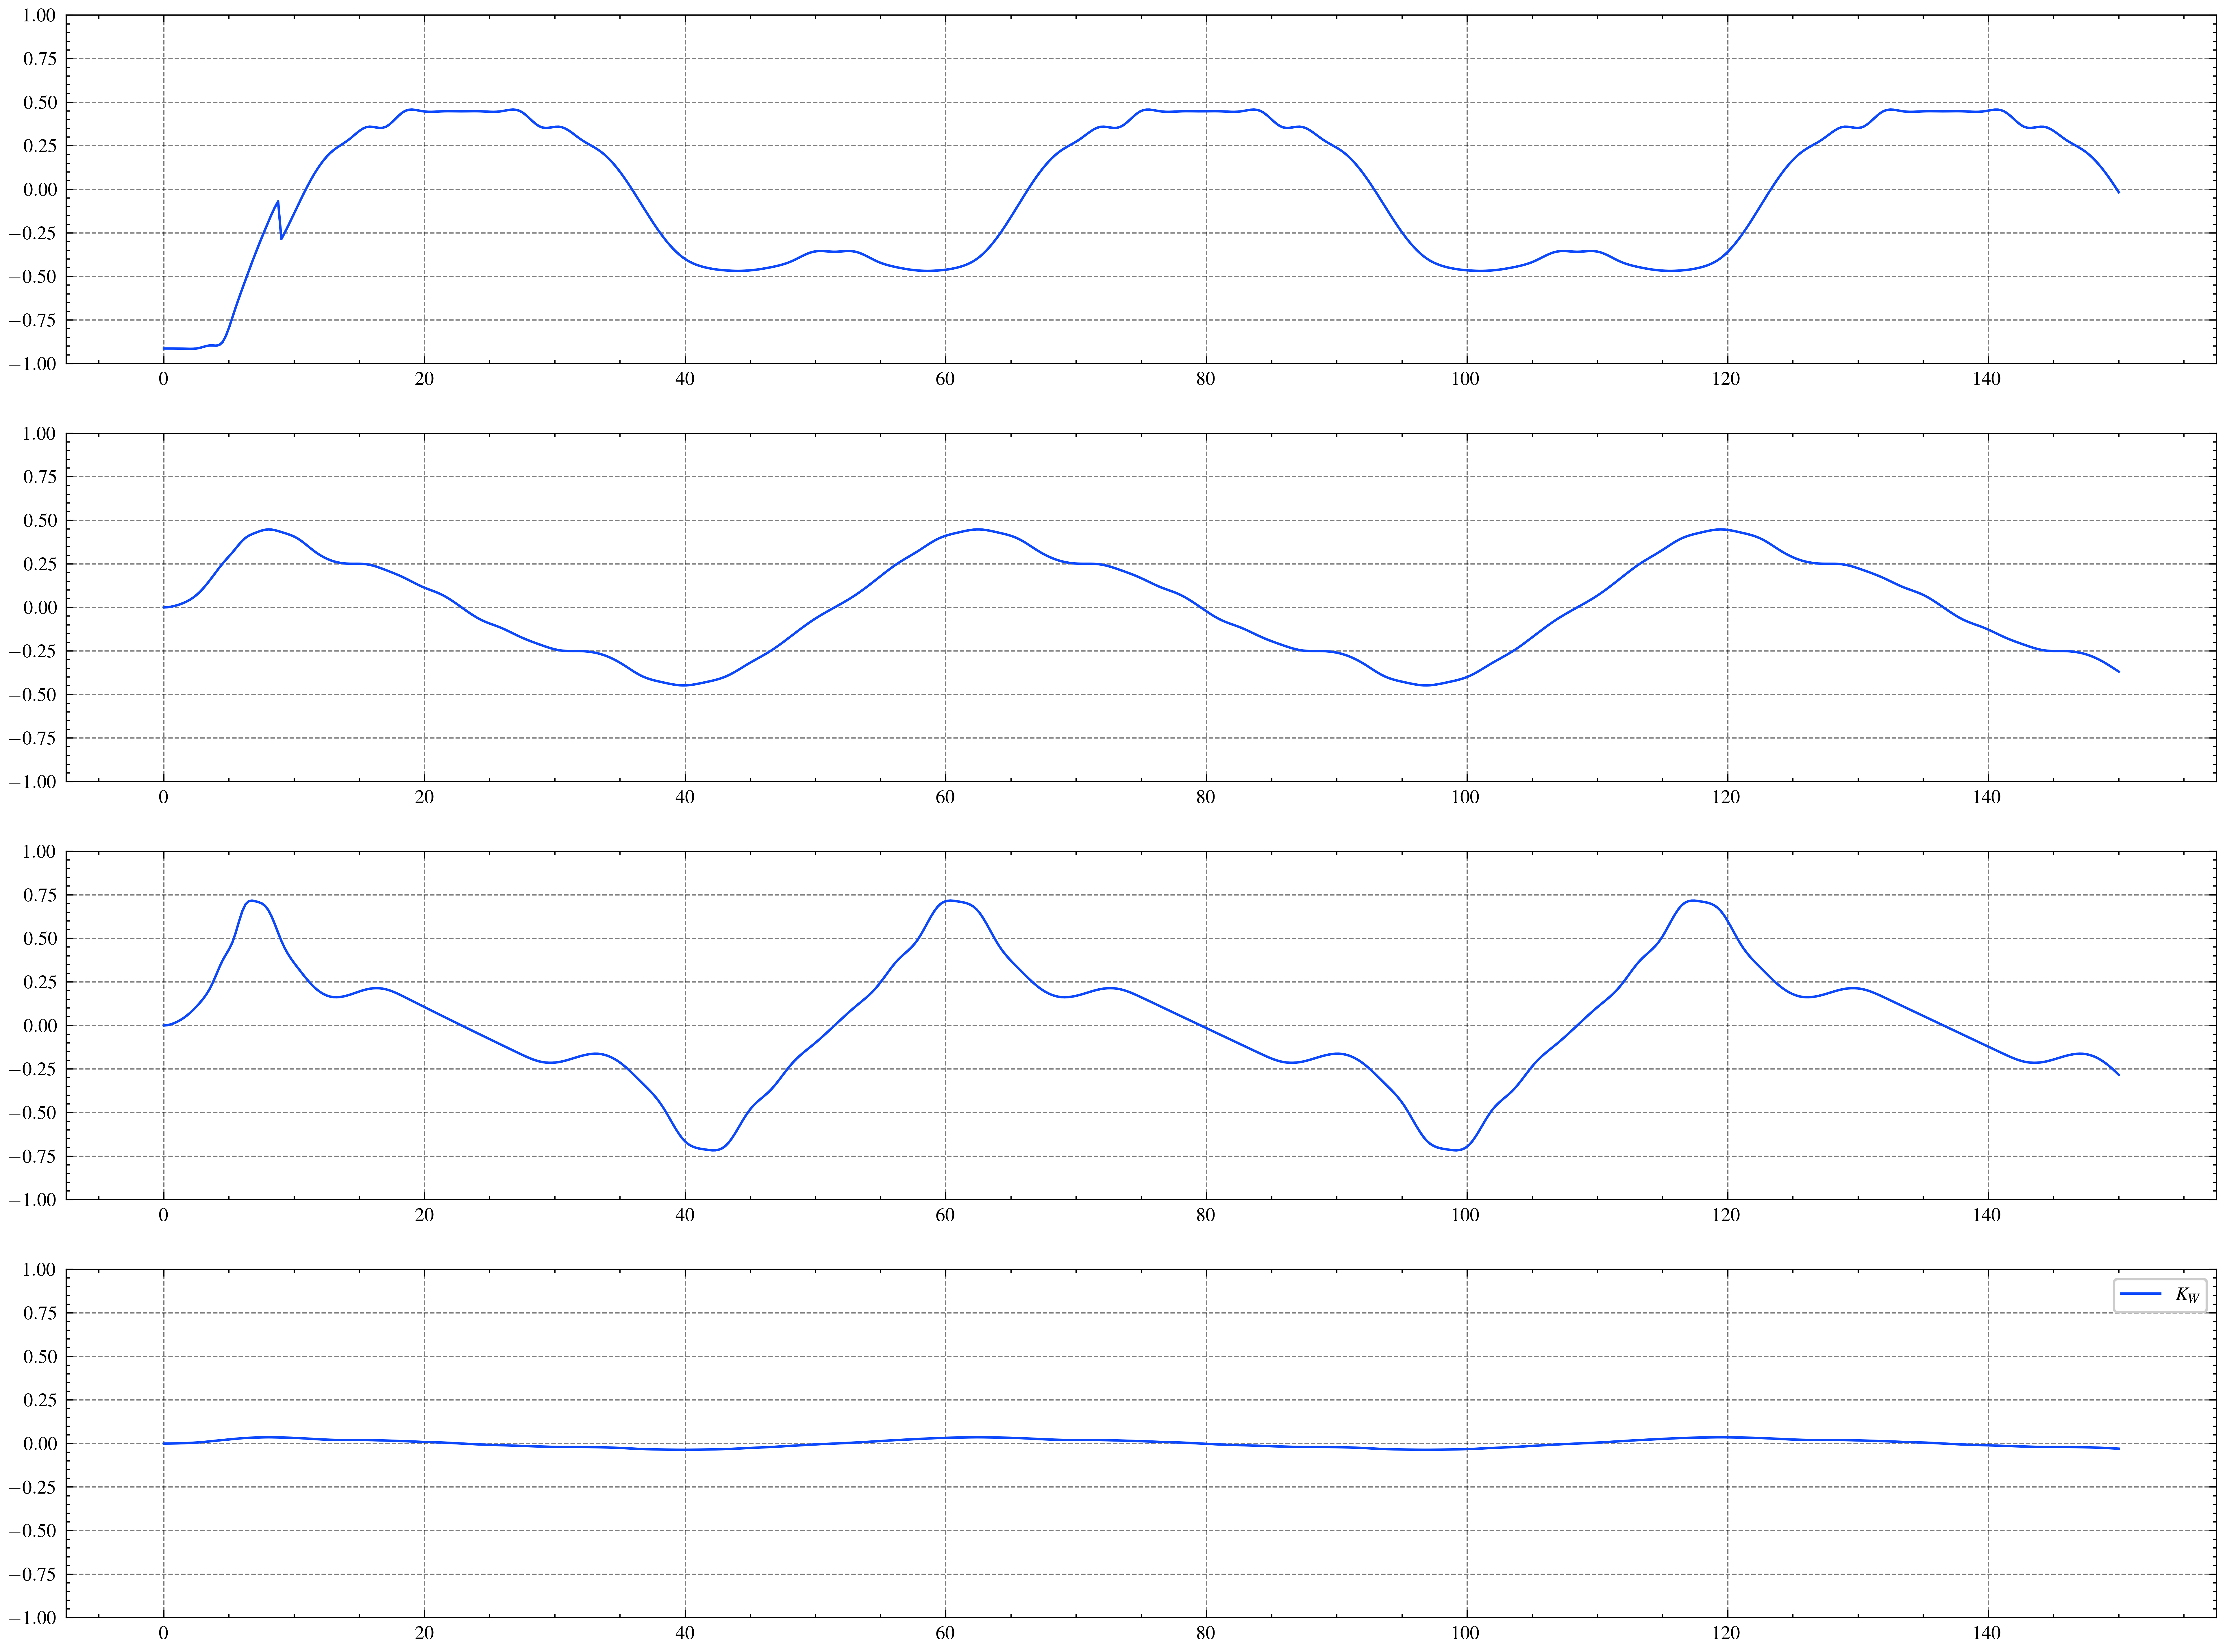

In [9]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(411)
ax1.plot(time_list, X_W_list, label="$X_W$")
ax1.set_ylim(-1, 1)

ax2 = fig.add_subplot(412)
ax2.plot(time_list, Y_W_list, label="$Y_W$")
ax2.set_ylim(-1, 1)

ax3 = fig.add_subplot(413)
ax3.plot(time_list, N_W_list, label="$N_W$")
ax3.set_ylim(-1, 1)

ax4 = fig.add_subplot(414)
ax4.plot(time_list, K_W_list, label="$K_W$")
ax4.set_ylim(-1, 1)


plt.legend()
plt.show()

In [10]:
df = pd.DataFrame(
    {
        "time": time_list,
        "u": u,
        "v": v,
        "r": r,
        "p": p,
        "x": x,
        "y": y,
        "psi": psi,
        "phi": phi,
        "X_W": X_W_list,
        "Y_W": Y_W_list,
        "N_W": N_W_list,
        "K_W": K_W_list,
        "δ": δ_rad_list,
        "nps": nps_list,
    }
)
df['x_bow'] = df['x'] + 0.5 * basic_params.L_pp * np.cos(df['psi'])
df['y_bow'] = df['y'] + 0.5 * basic_params.L_pp * np.sin(df['psi'])
df['x_stern'] = df['x'] - 0.5 * basic_params.L_pp * np.cos(df['psi'])
df['y_stern'] = df['y'] - 0.5 * basic_params.L_pp * np.sin(df['psi'])
df.to_csv("mmg_4dof_in_waves.csv", index=False)